# visualizacion DE DATOS GEOESPACIALES

# df

In [8]:
#df = pd.read_csv('properatti.csv',sep=',',index_col=0)

In [9]:
df.loc[7367,'place_name'] = 'Tigre'

In [11]:
df.reset_index(inplace=True)

In [12]:
# cambiamos el index obtenido como columna por index_df para poder mergear las geometrias
df.columns = ['index_df', 'operation', 'property_type', 'place_name',
       'place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
       'lat-lon', 'lat', 'lon', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail']

In [13]:
# quitamos las columnas que ya no necesitamos o fueon actualizadas con el geoshape
df = df.drop(['place_name','place_with_parent_names', 'country_name', 'state_name', 'geonames_id',
              'lat-lon', 'lat', 'lon'],axis=1)

# geo depurada

In [14]:
# leemos el geo_shape generado anteriormente
geodf_test = gpd.read_file('geo_properatti.shp',crs=crs)
geodf_test.sample(3)

,index_df,place_name,state_name,geo_ok,geometry
40798,40798,Córdoba,Córdoba,1,POINT (-64.23657 -31.40281)
113565,113565,Caballito,Ciudad Autónoma de Buenos Aires,1,POINT (-58.43090 -34.61868)
32507,32507,Mar del Plata,Buenos Aires,1,POINT (-57.54858 -37.99285)


In [15]:
# generamos el listado de provincias
prov_names = list(provincias.provincia.unique())

# merge

In [17]:
df = geodf_test.merge(df,on='index_df')

In [18]:
df.columns

Index(['index_df', 'place_name', 'state_name', 'geo_ok', 'geometry',
       'operation', 'property_type', 'price', 'currency',
       'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
       'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
       'rooms', 'expenses', 'properati_url', 'description', 'title',
       'image_thumbnail'],
      dtype='object')

In [19]:
# reacomodamos las columnas mas o menos como estaban en DF y quitamos index_df
df = df.reindex(['operation', 'property_type', 'place_name', 'state_name','price', 'currency',
                 'price_aprox_local_currency', 'price_aprox_usd', 'surface_total_in_m2',
                 'surface_covered_in_m2', 'price_usd_per_m2', 'price_per_m2', 'floor',
                 'rooms', 'expenses', 'properati_url', 'description', 'title',
                 'image_thumbnail','geo_ok', 'geometry'],axis=1)

# LISTO, TODO COMPLETO

# GEOLOCALIZACION - visualizacion

In [22]:
#para evitar problemas en el nombre de df, lo copiamos como geodf
geodf = df.copy()

In [23]:
geodf.columns

Index(['operation', 'property_type', 'place_name', 'state_name', 'price',
       'currency', 'price_aprox_local_currency', 'price_aprox_usd',
       'surface_total_in_m2', 'surface_covered_in_m2', 'price_usd_per_m2',
       'price_per_m2', 'floor', 'rooms', 'expenses', 'properati_url',
       'description', 'title', 'image_thumbnail', 'geo_ok', 'geometry'],
      dtype='object')

# CONTEO ESPACIAL x Provincia

In [24]:
geodf.head(1)

,operation,property_type,place_name,state_name,price,currency,price_aprox_local_currency,price_aprox_usd,surface_total_in_m2,surface_covered_in_m2,...,price_per_m2,floor,rooms,expenses,properati_url,description,title,image_thumbnail,geo_ok,geometry
0,sell,PH,Mataderos,Ciudad Autónoma de Buenos Aires,62000.0,USD,1093959.0,62000.0,55.0,40.0,...,1550.0,NaN,NaN,NaN,http://www.properati.com.ar/15bo8_venta_ph_mat...,"2 AMBIENTES TIPO CASA PLANTA BAJA POR PASILLO,...",2 AMB TIPO CASA SIN EXPENSAS EN PB,https://thumbs4.properati.com/8/BluUYiHJLhgIIK...,1,POINT (-58.50884 -34.66182)


In [25]:
# armo un diccionario con la geometría de cada provincia
prov_geo_dic = {provincias.provincia.iloc[i] : provincias.geometry.iloc[i] for i in range(len(provincias))}

In [26]:
cant_prov = geodf.groupby(['state_name'])[['place_name']].count()
cant_prov.reset_index(inplace=True)

cant_prov['geometry'] = cant_prov.state_name.map(prov_geo_dic)

cant_prov.head()

,state_name,place_name,geometry
0,Buenos Aires,61108,"(POLYGON ((-62.08311252 -40.2596222, -62.08218..."
1,Catamarca,27,"POLYGON ((-65.16784853999999 -28.6345516, -65...."
2,Chaco,57,"POLYGON ((-60.91052716 -28.0012453, -60.937610..."
3,Chubut,259,"(POLYGON ((-66.30172186 -45.07900713, -66.3005..."
4,Ciudad Autónoma de Buenos Aires,32316,"POLYGON ((-58.42482707 -34.66386893, -58.42499..."


In [27]:
cant_prov.columns = ['provincia', 'frecuencia', 'geometry']
cant_prov = gpd.GeoDataFrame(cant_prov)
cant_prov.loc[[0,4]]

,provincia,frecuencia,geometry
0,Buenos Aires,61108,"MULTIPOLYGON (((-62.08311 -40.25962, -62.08219..."
4,Ciudad Autónoma de Buenos Aires,32316,"POLYGON ((-58.42483 -34.66387, -58.42499 -34.6..."


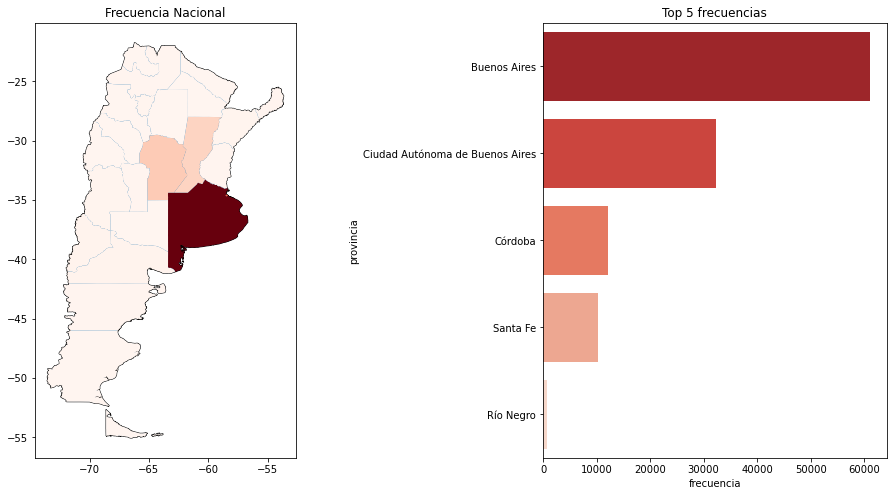

In [28]:
#agrando el tamaño de la figura
fig = plt.figure(figsize=(16,8))
#en 1 columna agrego 2 pares de ejes 

ax = fig.add_subplot(1,2,1)
argentina.plot(ax=ax,edgecolor='k')
cant_prov.plot(ax=ax,column='frecuencia',cmap='Reds')
plt.title('Frecuencia Nacional')

ax1 = fig.add_subplot(1,2,2)
barras = cant_prov.sort_values('frecuencia',ascending=False)
barras = barras.head(5)
plt.title('Top 5 frecuencias')

sns.barplot(x="frecuencia", y="provincia", data=barras, ax=ax1,palette='Reds_r')

plt.subplots_adjust(hspace=0.3,wspace=0.6)

# funcion por provincia

In [29]:
# armo un diccionario con las geometrías de cada departamento
dep_geo_dic = {mapBase.departamen.iloc[i] : mapBase.geometry.iloc[i] for i in range(len(mapBase))}

In [30]:
prov = 'Buenos Aires'

In [31]:
def analisis_provincial(prov):
    '''esta funcion toma el nombre de una provincia y hace en analisis de frecuencia del geodf
    devuelve una figura con dos ejes. Uno es el ploteo en el mapa de departamentos coloreados segun la frecuencia
    la otra es un grafico de barras horizontales que muestra los valores mas grandes por departamento'''
    # selecciono el mapa base de la provincia
    plot_map = mapBase.loc[mapBase.provincia == prov]

    # selecciono del df los registros de la provincia
    puntos = geodf.loc[geodf.state_name == prov][['property_type','place_name','geometry']]

    # genero un spatial joint con los puntos y mi mapa
    sjoint = gpd.sjoin(plot_map,puntos,how='inner')
    # dropeo resultados para agilizar el dic
    df_unic = sjoint.drop_duplicates(subset='departamen')
    # genero un diccionario de poligonos por departamento
    dep_geo_dic = {df_unic.departamen.iloc[i]:df_unic.geometry.iloc[i] for i in range(len(df_unic))}

    # agrupo el sjoint por departamento para contabilizar la frecuencia
    sjoint = sjoint.groupby('departamen')[['codpcia']].count()
    sjoint.reset_index(inplace=True)
    # mapeo el dic sobre los departamentos
    sjoint['geometry'] = sjoint.departamen.map(dep_geo_dic)
    # vuelvo a convertirlo en geoDF
    sjoint = gpd.GeoDataFrame(sjoint)
    # acomodo las columnas
    sjoint.columns = ['departamen','frecuencia','geometry']

    #agrando el tamaño de la figura
    fig = plt.figure(figsize=(17,10))
    #en 1 columna agrego 2 pares de ejes 

    ax = fig.add_subplot(1,2,1)
    plot_map.plot(ax=ax,color='lightgrey',edgecolor='lightgrey',alpha=0.2)
    sjoint.plot(ax=ax,column='frecuencia',cmap='Reds',edgecolor='lightgrey',scheme='Quantiles',legend=True)
    #puntos.plot(ax=ax,color='r',alpha=0.1)
    plt.title('Frecuencia de la provincia de {}'.format(prov))

    ax1 = fig.add_subplot(1,2,2)
    barras = sjoint.sort_values('frecuencia',ascending=False)
    barras = barras.head(5)
    plt.title('Top 5 frecuencias')
    sns.barplot(x="frecuencia", y="departamen", data=barras, ax=ax1,palette='Reds_r')
    plt.subplots_adjust(hspace=0.3,wspace=0.2)

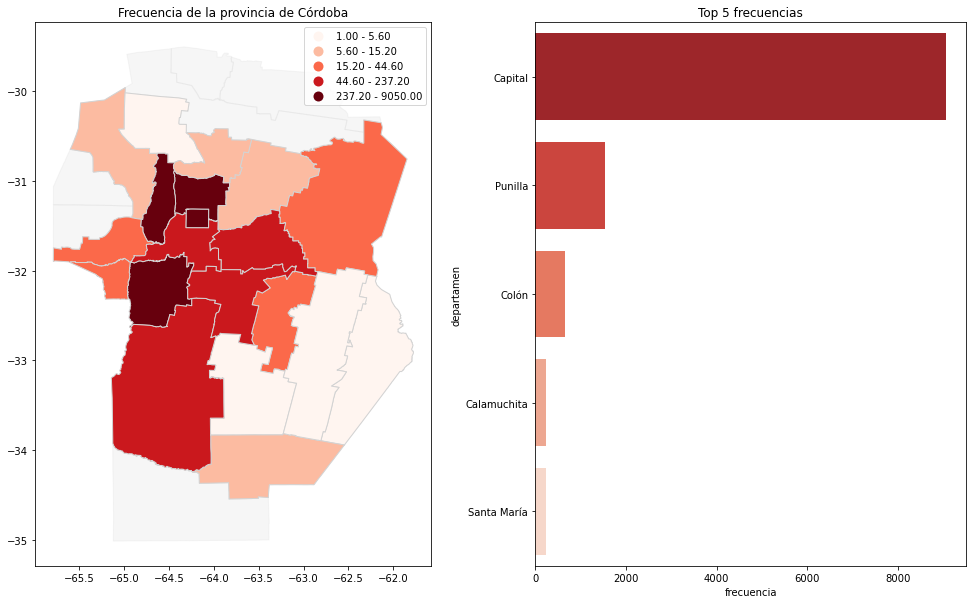

In [33]:
analisis_provincial('Córdoba')